# Amazon's Best Sellers 2025 - EDA

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [37]:
best_sellers = pd.read_csv("data/Amazon_bestsellers_items_2025.csv")
best_sellers

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
0,0,1,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...,₹469.00,4.3,13324.0,https://www.amazon.in/dp/B073VKKNN9,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
1,1,2,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year...",₹370.00,4.4,2291.0,https://www.amazon.in/dp/B07PQZJ6Y8,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
2,2,3,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...,"₹1,799.00",4.5,388.0,https://www.amazon.in/dp/B0D1KL34JM,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
3,3,4,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit...",₹94.00,4.1,9630.0,https://www.amazon.in/dp/B07B9YYLGG,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
4,4,5,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...","₹1,699.00",4.4,5783.0,https://www.amazon.in/dp/B073VLGMZ4,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,96,B0DP7LBGM1,Microsoft Windows Server 2025 Standard Edition...,"$1,561.01",NaN,NaN,https://www.amazon.com.mx/dp/B0DP7LBGM1,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
995,995,97,B0CFZNMZW6,Photoshop Elements 2024 and Premiere Elements ...,"$3,067.45",4.0,82.0,https://www.amazon.com.mx/dp/B0CFZNMZW6,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
996,996,98,B09H2BRVWZ,Microsoft Office Hogar y Empresa 2021,"$5,999.00",4.9,12.0,https://www.amazon.com.mx/dp/B09H2BRVWZ,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
997,997,99,B0C55NKHKL,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D...",NaN,3.7,3.0,https://www.amazon.com.mx/dp/B0C55NKHKL,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2


#### Basic understanding of data

In [38]:
# basic info
best_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           999 non-null    int64  
 1   rank                 999 non-null    int64  
 2   asin                 999 non-null    object 
 3   product_title        999 non-null    object 
 4   product_price        945 non-null    object 
 5   product_star_rating  969 non-null    float64
 6   product_num_ratings  969 non-null    float64
 7   product_url          999 non-null    object 
 8   product_photo        999 non-null    object 
 9   rank_change_label    0 non-null      float64
 10  country              999 non-null    object 
 11  page                 999 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.8+ KB


In [18]:
# missing values
best_sellers.isnull().sum()

Unnamed: 0               0
rank                     0
asin                     0
product_title            0
product_price           54
product_star_rating     30
product_num_ratings     30
product_url              0
product_photo            0
rank_change_label      999
country                  0
page                     0
dtype: int64

In [40]:
# basic stat
best_sellers.describe()

,Unnamed: 0,rank,product_star_rating,product_num_ratings,rank_change_label,page
count,999.000000,999.000000,969.000000,969.000000,0.0,999.000000
mean,499.000000,50.450450,4.140248,1312.546956,NaN,1.499499
std,288.530761,28.852421,0.496382,3025.241537,NaN,0.500250
min,0.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,249.500000,25.500000,3.900000,54.000000,NaN,1.000000
50%,499.000000,50.000000,4.200000,218.000000,NaN,1.000000
75%,748.500000,75.000000,4.400000,1009.000000,NaN,2.000000
max,998.000000,100.000000,5.000000,19189.000000,NaN,2.000000


In [41]:
# shape
best_sellers.shape

(999, 12)

#### Data cleaning 

In [44]:
# Clean product_price
best_sellers['product_price'] = best_sellers['product_price'].astype(str)

# Remove currency symbols and spaces
best_sellers['product_price'] = best_sellers['product_price'].replace(r'[₹$,€]', '', regex=True)

# Replace commas and weird spaces (like non-breaking)
best_sellers['product_price'] = best_sellers['product_price'].str.replace(',', '').str.strip()

# Convert to numeric
best_sellers['product_price'] = pd.to_numeric(best_sellers['product_price'], errors='coerce')

# Drop rows where price couldn't be converted
best_sellers = best_sellers.dropna(subset=['product_price'])

# checking for missing values
best_sellers.isnull().sum()

Unnamed: 0               0
rank                     0
asin                     0
product_title            0
product_price            0
product_star_rating     23
product_num_ratings     23
product_url              0
product_photo            0
rank_change_label      848
country                  0
page                     0
dtype: int64

In [29]:
# top 5 expensive peoducts
best_sellers.sort_values(by='product_price', ascending=False).head()


,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
608,608,10,B07NLL3CWD,Adobe Creative Cloud | Standard | 1 Anno | PC/...,44799.0,4.3,14.0,https://www.amazon.it/dp/B07NLL3CWD,https://images-eu.ssl-images-amazon.com/images...,NaN,IT,1
563,563,65,B00EV554A6,Adobe Creative Cloud All Apps | 1 an | PC/Mac ...,41999.0,4.0,87.0,https://www.amazon.fr/dp/B00EV554A6,https://images-eu.ssl-images-amazon.com/images...,NaN,FR,2
427,427,29,B00CSRZ7EC,Adobe Creative Cloud|Grafik Design|Gen KI||PC/...,36890.0,4.6,478.0,https://www.amazon.de/dp/B00CSRZ7EC,https://images-eu.ssl-images-amazon.com/images...,NaN,DE,1
641,641,43,B09XH39NQQ,Windows 11 │ Pro Edition │ Codice d'attivazion...,25900.0,3.7,12.0,https://www.amazon.it/dp/B09XH39NQQ,https://images-eu.ssl-images-amazon.com/images...,NaN,IT,1
679,679,81,B09V92RBB5,"Corel CorelDRAW Graphics Suite 2024, 1 anno, 1...",21540.0,4.0,3.0,https://www.amazon.it/dp/B09V92RBB5,https://images-eu.ssl-images-amazon.com/images...,NaN,IT,2


In [31]:
# average rating by country
best_sellers.groupby('country')['product_star_rating'].mean()

country
AU    4.241791
CA    4.050515
DE    4.310204
ES    3.965979
FR    4.056250
IN    4.313000
IT    4.214583
MX    4.151282
US    4.108333
Name: product_star_rating, dtype: float64

### Data Visulization

#### Histogram

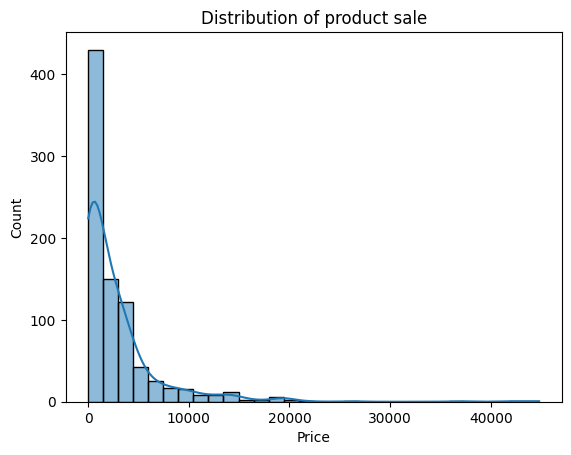

In [33]:
sns.histplot( best_sellers['product_price'].dropna(),bins=30, kde=True)
plt.title('Distribution of product sale')
plt.xlabel('Price')
plt.show()

#### Boxplot of ratings by country

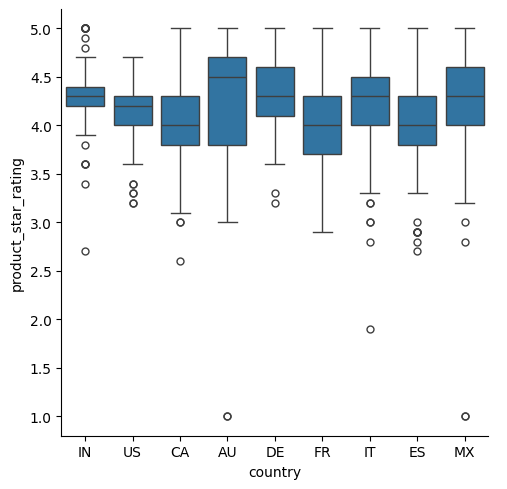

In [34]:
# sns.boxplot(x='country', y='product_star_rating',data=best_sellers)
# plt.title('Rating by Counties')
# plt.show()

# Box Plot using Figure Level Fucntion
sns.catplot(x='country',y='product_star_rating',data=best_sellers,kind='box')

#### Scatter Plot

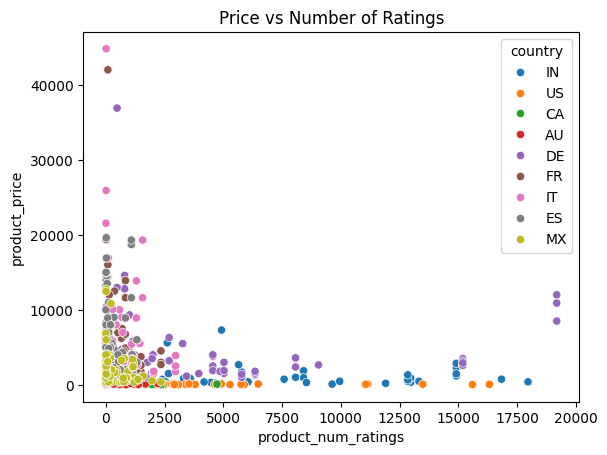

In [35]:
sns.scatterplot(x='product_num_ratings', y='product_price', hue='country', data=best_sellers)
plt.title("Price vs Number of Ratings")
plt.show()